In [1]:
from keras.applications import ResNet50
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import InceptionV3
from keras.applications import Xception
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import cv2

Using TensorFlow backend.


# GLOBAL

In [2]:
MODELS = {
    'vgg16': VGG16,
    'vgg19': VGG19,
    'inception': InceptionV3,
    'xception': Xception,
    'resnet': ResNet50
    
}

mdl = 'vgg19'

# initialize input shape along with preprocess function to change input shape based on the model
# This is because models trained on imagenet accept inputs of 224 x 224, 227 x 227, 256 x 256 
# and 299 x 299
input_shape = (224, 224)    # VGG16, VGG19 and ResNet
preprocess = imagenet_utils.preprocess_input

# configure input shape for inception and xception models
if mdl in ('inception', 'xception'):
    input_shape = (299, 299)
    preprocess = preprocess_input

input_shape

(224, 224)

# LOAD WEIGHTS

In [3]:
print('[INFO] loading {}...'.format(mdl))
Network = MODELS[mdl]
model = Network(weights='imagenet')

[INFO] loading vgg16...
553467904/553467096 [==============================] - 1290s 2us/step


# LOAD IMAGE AND PREPROCESS

[INFO] loading...


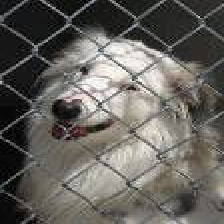

In [4]:
# Loading
print('[INFO] loading...')
image_path = 'C:/Users/Tajr/Desktop/test1/test1/810.jpg'
image_og = load_img(image_path, target_size=input_shape)
image_og

In [5]:
# Convert image to array
image = img_to_array(image_og)
image

array([[[ 24.,  25.,  27.],
        [ 24.,  25.,  27.],
        [  9.,  10.,  12.],
        ...,
        [ 50.,  46.,  45.],
        [ 61.,  57.,  56.],
        [ 61.,  57.,  56.]],

       [[ 25.,  26.,  28.],
        [ 25.,  26.,  28.],
        [ 26.,  27.,  29.],
        ...,
        [ 51.,  47.,  46.],
        [ 29.,  25.,  24.],
        [ 29.,  25.,  24.]],

       [[ 25.,  26.,  28.],
        [ 25.,  26.,  28.],
        [ 26.,  27.,  29.],
        ...,
        [ 51.,  47.,  46.],
        [ 29.,  25.,  24.],
        [ 29.,  25.,  24.]],

       ...,

       [[ 10.,  10.,  10.],
        [ 10.,  10.,  10.],
        [ 11.,  11.,  11.],
        ...,
        [110., 110., 102.],
        [113., 113., 103.],
        [113., 113., 103.]],

       [[ 10.,  10.,  10.],
        [ 10.,  10.,  10.],
        [ 11.,  11.,  11.],
        ...,
        [110., 110., 102.],
        [113., 113., 103.],
        [113., 113., 103.]],

       [[  9.,   9.,   9.],
        [  9.,   9.,   9.],
        [ 10.,  

In [6]:
# Expand image dimension to fit 4-dim input shape(1, w, h, channels) and preprocess the image
image = np.expand_dims(image, axis=0)
image = preprocess(image)
image.shape

(1, 224, 224, 3)

In [7]:
image

array([[[[ -76.939    ,  -91.779    ,  -99.68     ],
         [ -76.939    ,  -91.779    ,  -99.68     ],
         [ -91.939    , -106.779    , -114.68     ],
         ...,
         [ -58.939003 ,  -70.779    ,  -73.68     ],
         [ -47.939003 ,  -59.779    ,  -62.68     ],
         [ -47.939003 ,  -59.779    ,  -62.68     ]],

        [[ -75.939    ,  -90.779    ,  -98.68     ],
         [ -75.939    ,  -90.779    ,  -98.68     ],
         [ -74.939    ,  -89.779    ,  -97.68     ],
         ...,
         [ -57.939003 ,  -69.779    ,  -72.68     ],
         [ -79.939    ,  -91.779    ,  -94.68     ],
         [ -79.939    ,  -91.779    ,  -94.68     ]],

        [[ -75.939    ,  -90.779    ,  -98.68     ],
         [ -75.939    ,  -90.779    ,  -98.68     ],
         [ -74.939    ,  -89.779    ,  -97.68     ],
         ...,
         [ -57.939003 ,  -69.779    ,  -72.68     ],
         [ -79.939    ,  -91.779    ,  -94.68     ],
         [ -79.939    ,  -91.779    ,  -94.68     ]],

# PREDICTION

In [8]:
print('[INFO] classifying image with {}...'.format(mdl))
predictions = model.predict(image)
P = imagenet_utils.decode_predictions(predictions)

# Display probabilities and their predictions
for(i, (imagenetID, label, prob)) in enumerate(P[0]):
    print('{}, {}: {:.2f}%'.format(i + 1, label, prob * 100))

[INFO] classifying image with vgg16...
1, white_wolf: 49.10%
2, Arctic_fox: 25.45%
3, timber_wolf: 9.36%
4, kuvasz: 1.20%
5, borzoi: 1.15%


In [9]:
orig = cv2.imread(image_path)
(imagenetID, label, prob) = P[0][0]
cv2.putText(orig, "Label: {}".format(label), (10, 30),
cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
cv2.imshow("Classification", orig)
cv2.waitKey(0)

-1